In [22]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get the data

In [23]:
import pandas as pd

train_data_path = 'train_data.csv'
test_data_path = 'test_data_X.csv'
    
def load_data():
        """
        This method used to load train and test data
        :return: None
        """
        try:
            train_dataset = pd.read_csv(train_data_path)
            test_dataset = pd.read_csv(test_data_path)
        except FileNotFoundError as ex:
            logging.error(ex)
            raise ex
        
        return train_dataset,test_dataset
        
print('The data set is loaded')

The data set is loaded


In [24]:
train_dataset,test_dataset = load_data()

In [16]:
print('The Training data set is ')
train_dataset.head()

The Training data set is 


,Id_Number,City,Gender,Age,Weight,Income,Illness
0,38755,New York City,NaN,39,NaN,105745.0,No
1,120124,Boston,NaN,25,173.0,85777.0,No
2,8404,Dallas,NaN,40,334.0,45347.0,No
3,6246,Dallas,NaN,50,NaN,49352.0,No
4,48787,New York City,NaN,53,259.0,112106.0,No


In [17]:
print('The Test data set is ')
test_dataset.head()

The Test data set is 


,Id_Number,City,Gender,Age,Weight,Income
0,41643,New York City,Male,58,NaN,120770.0
1,70418,Los Angeles,Male,28,NaN,95036.0
2,134350,San Diego,Male,45,176.0,109408.0
3,31406,New York City,Female,33,145.0,92108.0
4,67669,New York City,Male,52,136.0,100554.0


In [18]:
print('The Training data Info')
train_dataset.info()

The Training data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112500 entries, 0 to 112499
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Id_Number  112500 non-null  int64  
 1   City       109125 non-null  object 
 2   Gender     106875 non-null  object 
 3   Age        112500 non-null  int64  
 4   Weight     56151 non-null   float64
 5   Income     112500 non-null  float64
 6   Illness    112500 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 6.0+ MB


In [19]:
train_dataset.isnull().sum()

Id_Number        0
City          3375
Gender        5625
Age              0
Weight       56349
Income           0
Illness          0
dtype: int64

In [25]:
train_dataset.describe()

,Id_Number,Age,Weight,Income
count,112500.000000,112500.000000,56151.000000,112500.000000
mean,74943.654622,41.502089,203.709729,91258.114818
std,43288.891678,16.732520,67.113088,24953.718012
min,1.000000,-1.000000,80.000000,584.000000
25%,37459.750000,32.000000,149.000000,80890.000000
50%,74915.500000,42.000000,208.000000,93633.000000
75%,112355.250000,55.000000,249.000000,104501.000000
max,149999.000000,65.000000,399.000000,177157.000000


Saving figure attribute_histogram_plots


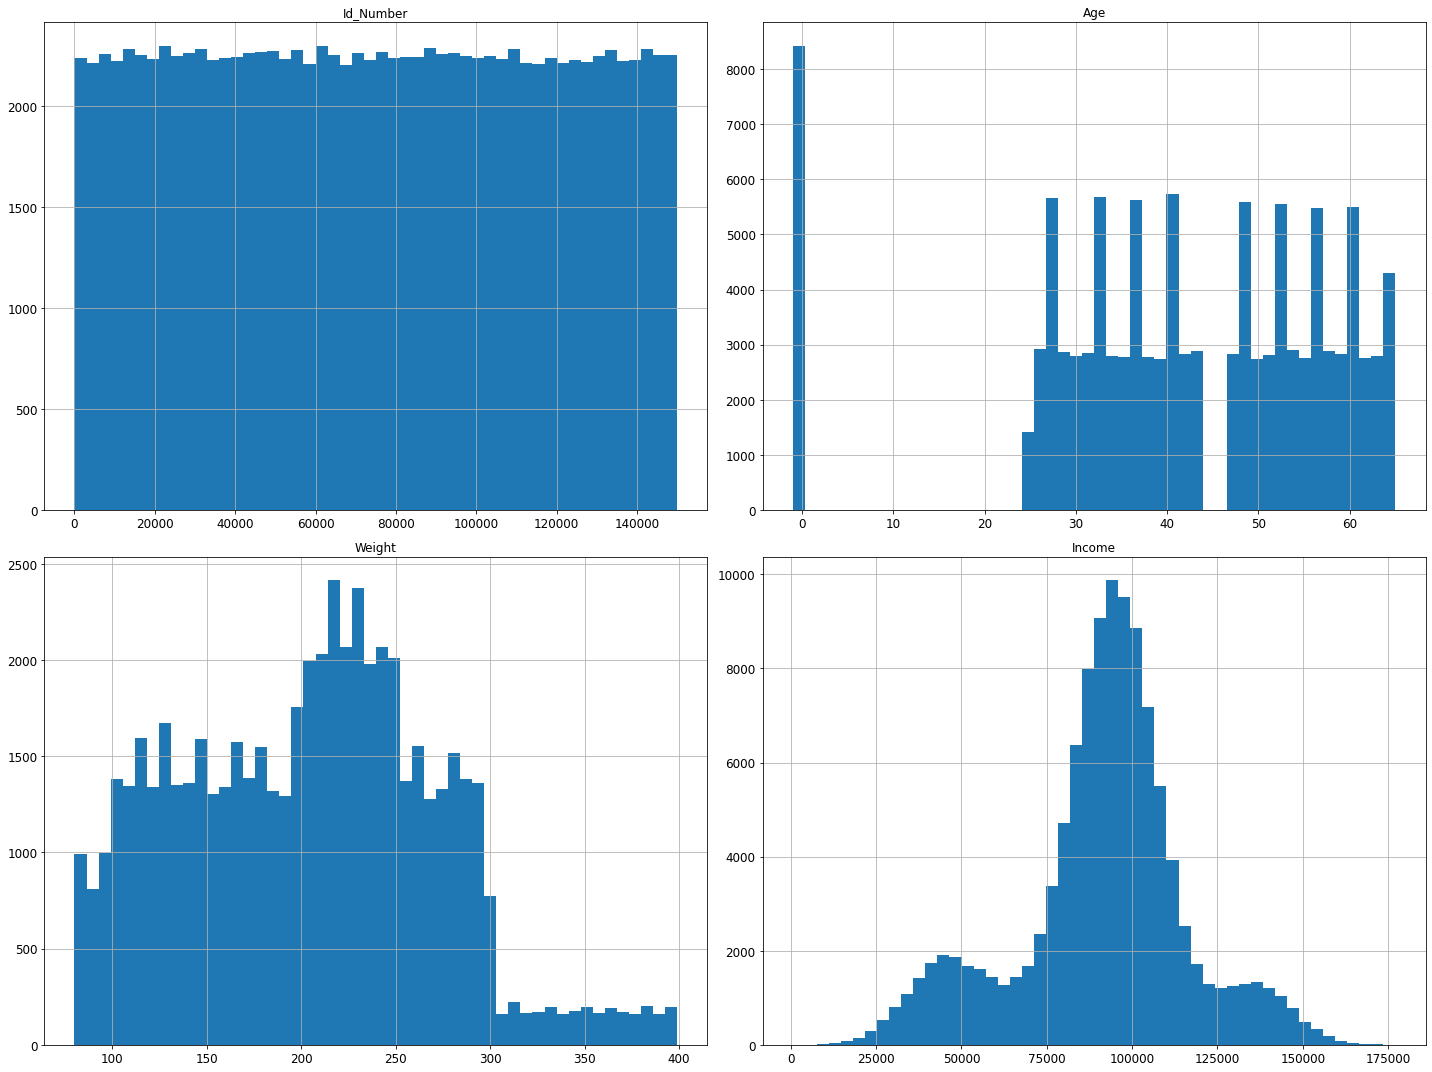

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
train_dataset.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [27]:
import numpy as np
np.random.seed(42)

In [28]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(train_dataset, test_size=0.2, random_state=42)

In [29]:
test_set.head()

,Id_Number,City,Gender,Age,Weight,Income,Illness
51197,69692,New York City,Male,58,204.0,79816.0,No
112243,69838,NaN,Male,50,318.0,99858.0,No
93113,134499,San Diego,Female,32,NaN,103136.0,No
55475,140449,Austin,Female,30,NaN,69039.0,No
86691,82107,Los Angeles,Male,43,NaN,92660.0,Yes


# Prepare the data set

In [94]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

prediction_column = ["Illness"]
def preprocess_data(input_df):
        """
        This method used to pre-process the data
        :param input_df: input data frame to pre-process the data
        :return: processed data set
        """
        dict_illness = {'No': 0, 'Yes': 1}
        dict_sex = {'Male': 0, 'Female': 1}
        simple_imputer = SimpleImputer(strategy='mean')

        # Id_Number,City,Gender,Age,Weight,Illness
        data_columns = list(input_df.columns)
        processed_dataset = input_df[data_columns].dropna()

        simple_imputer.fit(processed_dataset[['Age']])
        processed_dataset[['Age']] = simple_imputer.transform(processed_dataset[['Age']])

        if "Illness" in data_columns:
            processed_dataset['Illness'] = processed_dataset[prediction_column].replace(dict_illness)

        processed_dataset['Gender'] = processed_dataset['Gender'].replace(dict_sex)
        label_encoder = LabelEncoder()
        processed_dataset['City'] = label_encoder.fit(processed_dataset["City"])\
                                    .transform(processed_dataset["City"])

        return processed_dataset


In [86]:

final_processed_train_dataset = preprocess_data(train_dataset)
final_processed_test_dataset = preprocess_data(test_dataset)
final_processed_dataset

,Id_Number,City,Gender,Age,Weight,Income,Illness
5626,18122,2,0,55.0,208.0,66580.0,1
5629,147422,0,1,40.0,182.0,94437.0,0
5632,52893,5,1,28.0,127.0,91157.0,0
5635,96627,3,1,53.0,215.0,74924.0,1
5636,31347,5,0,32.0,150.0,107072.0,0
...,...,...,...,...,...,...,...
109110,7282,2,1,64.0,272.0,50527.0,0
109112,23147,5,0,-1.0,231.0,96908.0,0
109114,135317,6,1,54.0,168.0,104521.0,1
109115,76362,3,0,-1.0,108.0,111474.0,1


# Select and train a model 

In [100]:
feature_list = list(final_processed_train_dataset.columns)

feature_index = '123'

selected_features = [feature_list[int(feature_index)-1] for feature_index in str(feature_index)]

    
def split_train_dataset():
    """
    This method will split the input training data set and select the user features
    :return: X axis training data set , Y axis training data set,
     X axis validation data set  and Y axis validation data set
    """
    print(f'Features selected: {selected_features}')

    train_size = 0.08

    x_train, x_validation, y_train, y_validation = \
        train_test_split(final_processed_dataset[selected_features],
                         final_processed_dataset[prediction_column], train_size=train_size)

    return x_train, x_validation, y_train, y_validation

In [101]:
x_train, x_validation, y_train, y_validation = split_train_dataset()

Features selected: ['Id_Number', 'City', 'Gender']


In [102]:
import pickle
import time
import logging


from sklearn.model_selection import train_test_split
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
    
def build_model(x_train_data=None, y_train_data=None):
    """
    BUILD REGRESSION MODEL WITH 0.68 and it will be > 91%
    This method will receive X , Y training data set and build a model based on user choice
    :param x_train_data: X axis training data set
    :param y_train_data: Y axis training data set
    :return: None
    """


    clf = DecisionTreeClassifier().fit(x_train_data, y_train_data)

    model_save_flag = 'Y'

    if model_save_flag.upper() == 'Y':
        t_stamp = time.strftime("%Y%m%d-%H%M%S")
        model_file = f"{t_stamp}.DecisionTreeClassifier.pickle"
        with open(model_file, 'wb') as model_file_ref:
            pickle.dump(clf, model_file_ref)

        print(f'The model is built and saved as {model_file}...')

    return clf


In [103]:
selected_model = build_model(x_train_data=x_train, y_train_data=y_train)

The model is built and saved as 20201116-012535.DecisionTreeClassifier.pickle...


In [66]:
# Execute Model and Predict 

In [110]:

test_data_output_csv = "test_data_y_pred.csv"
def execute_model_prediction(x_validation, y_validation):
        """
        This method will execute the model predictions and save the predictions
        :param x_validation: X axis validation set
        :param y_validation: Y axis validation set
        :return: None
        """
        accuracy = selected_model.score(x_validation, y_validation)

        print(f'The accuracy of the model is {accuracy:.5f}')

        #print("Do you want to see the confusion matrix? (y/n)")

        confuse_mtx_flag = 'Y' #str(input().strip())

        y_pred = selected_model.predict(x_validation)

        if confuse_mtx_flag.upper() == 'Y':
            print(confusion_matrix(y_validation, y_pred))

        #print("Do you want to save the outcome for the test data ? (y/n)")

        outcome_flag = 'Y' #str(input().strip())

        if outcome_flag.upper() == 'Y':
            y_pred = selected_model.predict(final_processed_test_dataset[selected_features])
            final_df = pd.DataFrame(y_pred,columns=["Illness"])
            #final_result_df = self.test_dataset.append(final_df["Illness"])
            list_of_values = final_df["Illness"].tolist()
            final_processed_test_dataset["Illness"] = list_of_values
            final_processed_test_dataset.to_csv(test_data_output_csv)
           

In [111]:
execute_model_prediction(x_validation, y_validation)

The accuracy of the model is 0.85552
[[27972  3347]
 [ 3514 12656]]


<AxesSubplot:>

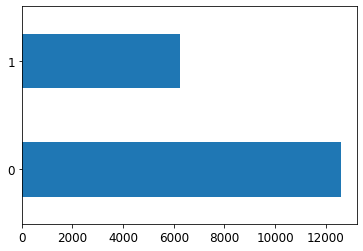

In [112]:
df = pd.read_csv("test_data_y_pred.csv")

pd.value_counts(df['Illness']).plot.barh(x='ABC', y='BVC')